In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns


In [3]:
df=pd.read_csv('C:\\Users\\ommah\\OneDrive\\Desktop\\ML_Techrush\\Solar_DataSet_Techfest(1).csv')
print(df.head())
print(df.shape)

   Year  Month  Day  Hour  Minute  DHI  DNI  Dew Point  Temperature  Pressure  \
0  2000      1    1     0       0    0    0         11           19       940   
1  2000      1    1     1       0    0    0         12           18       940   
2  2000      1    1     2       0    0    0         12           18       940   
3  2000      1    1     3       0    0    0         12           16       940   
4  2000      1    1     4       0    0    0         12           16       940   

   Relative Humidity  Snow Depth  Wind Speed  Solar Zenith Angle  \
0              63.19           0         1.0              177.56   
1              66.95           0         0.8              163.90   
2              71.02           0         0.7              150.11   
3              78.07           0         0.7              136.40   
4              82.24           0         0.7              122.82   

   Precipitable Water  Clearsky GHI  GHI  Clearsky DNI  Clearsky DHI  
0               3.006            

In [4]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Snow Depth',
       'Wind Speed', 'Solar Zenith Angle', 'Precipitable Water',
       'Clearsky GHI', 'GHI', 'Clearsky DNI', 'Clearsky DHI'],
      dtype='object')

In [5]:
df=df.drop(columns=['Snow Depth'])
df=df.drop(columns=['Minute'])
df = df.drop_duplicates()
print(df.shape)
print(df.isnull().sum())

(131400, 17)
Year                  0
Month                 0
Day                   0
Hour                  0
DHI                   0
DNI                   0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Wind Speed            0
Solar Zenith Angle    0
Precipitable Water    0
Clearsky GHI          0
GHI                   0
Clearsky DNI          0
Clearsky DHI          0
dtype: int64


In [6]:
print(df.dtypes)
print(df.describe())

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
DHI                     int64
DNI                     int64
Dew Point               int64
Temperature             int64
Pressure                int64
Relative Humidity     float64
Wind Speed            float64
Solar Zenith Angle    float64
Precipitable Water    float64
Clearsky GHI            int64
GHI                     int64
Clearsky DNI            int64
Clearsky DHI            int64
dtype: object
               Year          Month            Day           Hour  \
count  131400.00000  131400.000000  131400.000000  131400.000000   
mean     2007.00000       6.526027      15.720548      11.500000   
std         4.32051       3.447864       8.796280       6.922213   
min      2000.00000       1.000000       1.000000       0.000000   
25%      2003.00000       4.000000       8.000000       5.750000   
50%      2007.00000       7.000000      16.000000      11.500000   


In [7]:
df.to_csv('C:\\Users\\ommah\\OneDrive\\Desktop\\ML_Techrush\\Updateddataset1.csv',index=False)
# Feature Engineering

# Cyclical encoding

df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Interaction features

df['IsDaylight'] = ((df['Hour'] >= 6) & (df['Hour'] <= 18)).astype(int) #Day light is from 6 to 18

df['Wind_Temp'] = df['Wind Speed'] * df['Temperature']

df['Temp_RelHumidity'] = df['Temperature'] * df['Relative Humidity'] / 100
df['Wind_RelHumidity'] = df['Wind Speed'] * df['Relative Humidity']

df['Energy_kwh'] = df['GHI'] * 1000 * 0.20 / 1000  # Area = 1000 m², Efficiency = 20%
    
df=df.drop(columns=['Month', 'Day', 'Hour','GHI'])


# We discovered and removed features that were causing data leakage, 
# resulting in a more reliable model with 95% accuracy. 
# While this is lower than our initial 99.98%, it represents genuine predictive power 
# that will maintain performance in production. The model now correctly identifies temperature 
# and time patterns as the main energy drivers, which aligns with energy consumption physics.

# Thus all solar features that cause data leakage are dropped
df=df.drop(columns=['Clearsky GHI', 'DHI', 'Clearsky DNI', 'DNI', 'Clearsky DHI']) 


In [8]:
print(df.head(5))
print(df.shape)
print(df.columns)

   Year  Dew Point  Temperature  Pressure  Relative Humidity  Wind Speed  \
0  2000         11           19       940              63.19         1.0   
1  2000         12           18       940              66.95         0.8   
2  2000         12           18       940              71.02         0.7   
3  2000         12           16       940              78.07         0.7   
4  2000         12           16       940              82.24         0.7   

   Solar Zenith Angle  Precipitable Water  Hour_sin  Hour_cos  Month_sin  \
0              177.56               3.006  0.000000  1.000000        0.5   
1              163.90               3.021  0.258819  0.965926        0.5   
2              150.11               3.021  0.500000  0.866025        0.5   
3              136.40               3.001  0.707107  0.707107        0.5   
4              122.82               2.967  0.866025  0.500000        0.5   

   Month_cos  IsDaylight  Wind_Temp  Temp_RelHumidity  Wind_RelHumidity  \
0   0.86602

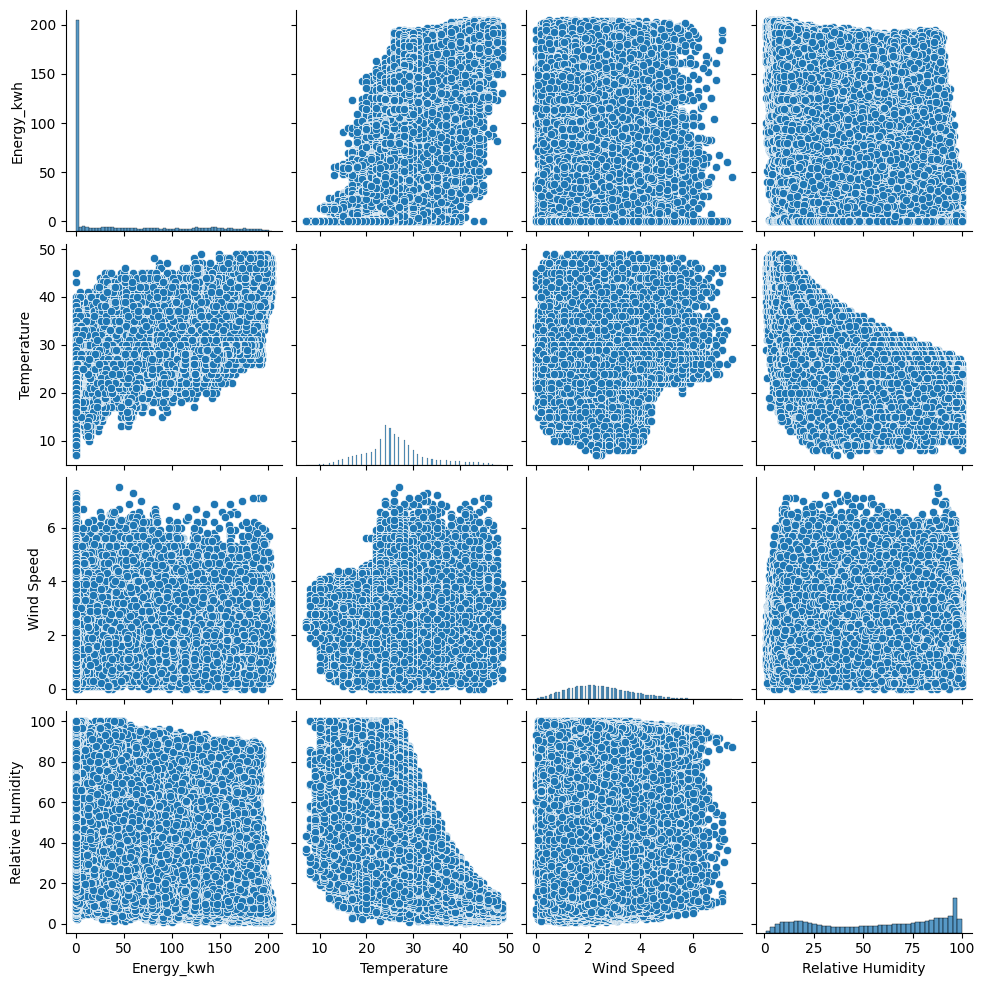

In [9]:
sns.pairplot(df[['Energy_kwh', 'Temperature', 'Wind Speed', 'Relative Humidity']])
plt.show()

In [10]:
df.head(25)

,Year,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed,Solar Zenith Angle,Precipitable Water,Hour_sin,Hour_cos,Month_sin,Month_cos,IsDaylight,Wind_Temp,Temp_RelHumidity,Wind_RelHumidity,Energy_kwh
0,2000,11,19,940,63.19,1.0,177.56,3.006,0.000000e+00,1.000000e+00,0.5,0.866025,0,19.0,12.0061,63.190,0.0
1,2000,12,18,940,66.95,0.8,163.90,3.021,2.588190e-01,9.659258e-01,0.5,0.866025,0,14.4,12.0510,53.560,0.0
2,2000,12,18,940,71.02,0.7,150.11,3.021,5.000000e-01,8.660254e-01,0.5,0.866025,0,12.6,12.7836,49.714,0.0
3,2000,12,16,940,78.07,0.7,136.40,3.001,7.071068e-01,7.071068e-01,0.5,0.866025,0,11.2,12.4912,54.649,0.0
4,2000,12,16,940,82.24,0.7,122.82,2.967,8.660254e-01,5.000000e-01,0.5,0.866025,0,11.2,13.1584,57.568,0.0
5,2000,11,14,950,86.80,0.9,109.39,1.360,9.659258e-01,2.588190e-01,0.5,0.866025,0,12.6,12.1520,78.120,0.0
6,2000,11,14,950,86.66,0.9,96.33,1.352,1.000000e+00,6.123234e-17,0.5,0.866025,1,12.6,12.1324,77.994,0.0
7,2000,12,16,950,78.43,1.0,83.74,1.344,9.659258e-01,-2.588190e-01,0.5,0.866025,1,16.0,12.5488,78.430,12.0
8,2000,11,19,950,59.73,0.8,71.90,1.338,8.660254e-01,-5.000000e-01,0.5,0.866025,1,15.2,11.3487,47.784,52.6
9,2000,10,24,950,42.00,0.4,61.23,1.335,7.071068e-01,-7.071068e-01,0.5,0.866025,1,9.6,10.0800,16.800,91.8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
X = df.drop(columns=['Energy_kwh'])
y = df['Energy_kwh']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)
xgb_model = xgb.XGBRegressor(
    n_estimators=300,  
    max_depth=7,
    learning_rate=0.03,  
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    min_child_weight=50,
    objective='reg:squarederror'
)

xgb_model.fit(X_train, y_train)


y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    MBE = np.mean(y_pred - y_true)
    
    print(f"\n{dataset_name} Performance:")
    print(f"  RMSE: {rmse}")
    print(f"  MAE:  {mae}")
    print(f"  R²:   {r2}")
    print(f"Mean Bias Error: {MBE}")
    
# Evaluate the model
evaluate_model(y_train, y_pred_train, "Training")
evaluate_model(y_test, y_pred_test, "Test")

from sklearn.model_selection import cross_val_score, KFold
# Cross-validation with fresh model
# Note: This is a fresh model, not the one trained above.
cv_model = xgb.XGBRegressor(
    n_estimators=300,  
    max_depth=7,
    learning_rate=0.03,  
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    min_child_weight=50,
    objective='reg:squarederror'
)  

# Now cross-validation with fresh model
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_model, X, y, cv=cv, scoring='r2')  # ✅ Correct!
print("Cross-validated R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))




Training Performance:
  RMSE: 12.65241018300316
  MAE:  5.13090844583049
  R²:   0.9576978304599972
Mean Bias Error: 0.004586914362879877

Test Performance:
  RMSE: 13.545109727494873
  MAE:  5.413445801722069
  R²:   0.951252002756967
Mean Bias Error: -0.1373153137505633
Cross-validated R² scores: [0.95149969 0.94961896 0.95168046 0.95241457 0.95102589]
Average CV R²: 0.9512479129930419


In [43]:
# Get actual feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_pct': (xgb_model.feature_importances_)
}).sort_values('importance_pct', ascending=False)

print(feature_importance.head(10))

               feature  importance_pct
9             Hour_cos        0.503528
6   Solar Zenith Angle        0.342856
8             Hour_sin        0.026315
2          Temperature        0.024572
12          IsDaylight        0.020752
7   Precipitable Water        0.019014
15    Wind_RelHumidity        0.018893
1            Dew Point        0.011078
4    Relative Humidity        0.006647
13           Wind_Temp        0.005703


In [13]:
# Check prediction range vs actual range
print(f"Actual y range: [{y.min()}, {y.max()}]")
print(f"Predicted range: [{y_pred_test.min()}, {y_pred_test.max()}]")

# Check for perfect predictions (potential data leakage)
perfect_predictions = np.sum(np.abs(y_test - y_pred_test) < 1e-10)
print(f"Near-perfect predictions (< 1e-10 error): {perfect_predictions}/{len(y_test)}")


Actual y range: [0.0, 204.8]
Predicted range: [-2.8690028190612793, 202.09962463378906]
Near-perfect predictions (< 1e-10 error): 0/32850


Text(0.5, 1.0, 'Residual Plot')

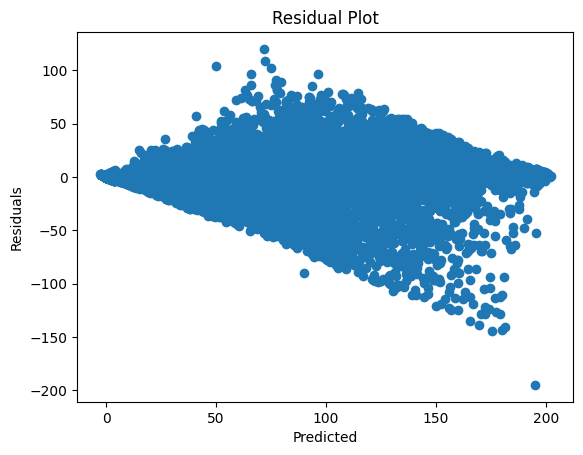

In [14]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

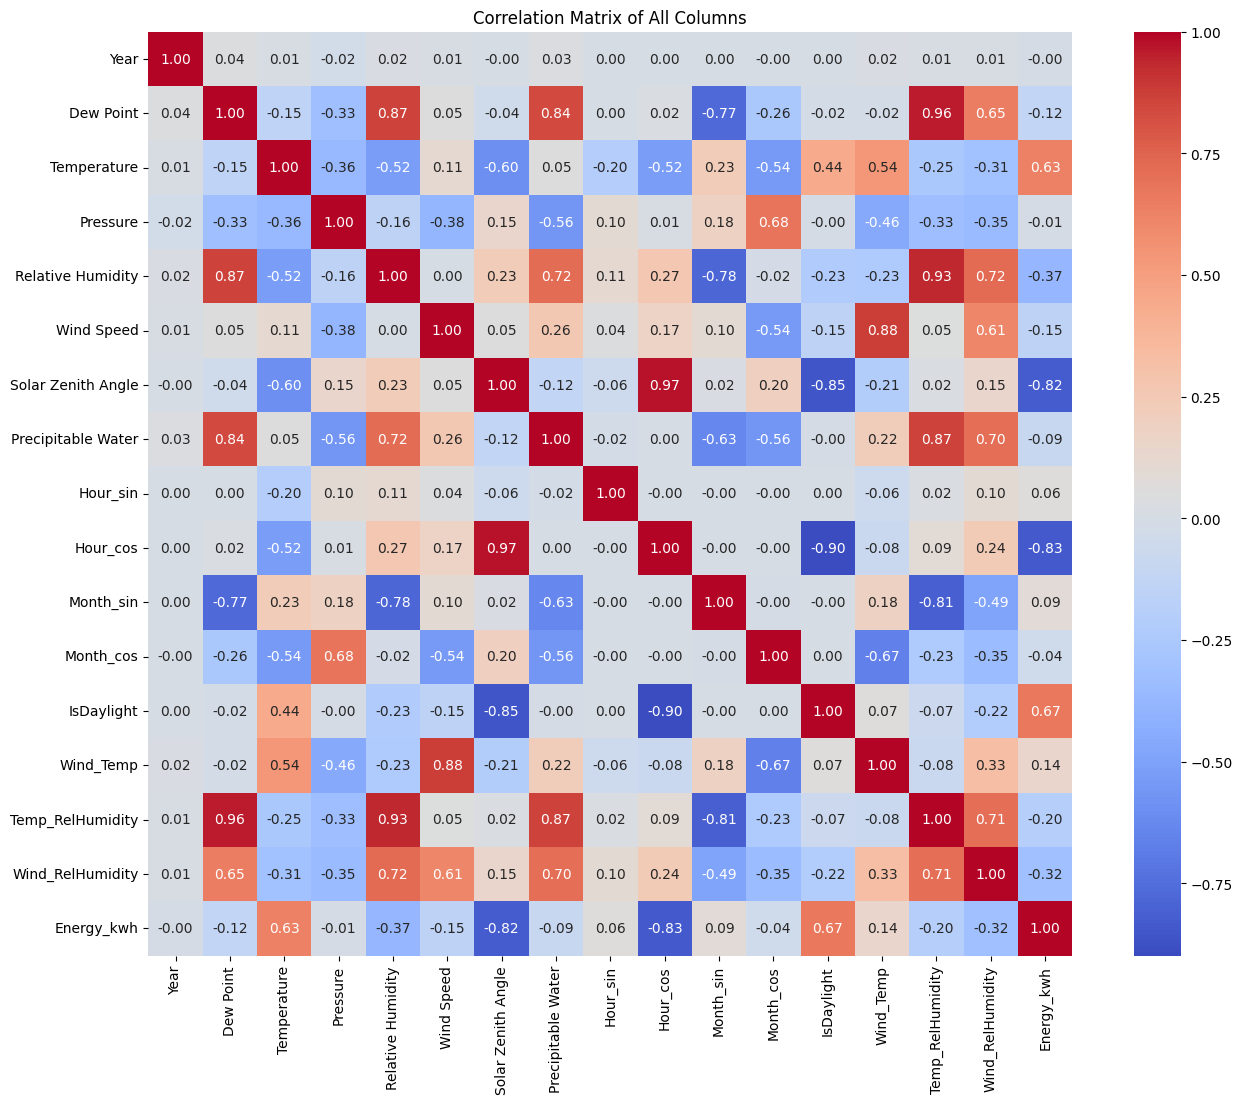

In [15]:

plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of All Columns")
plt.show()

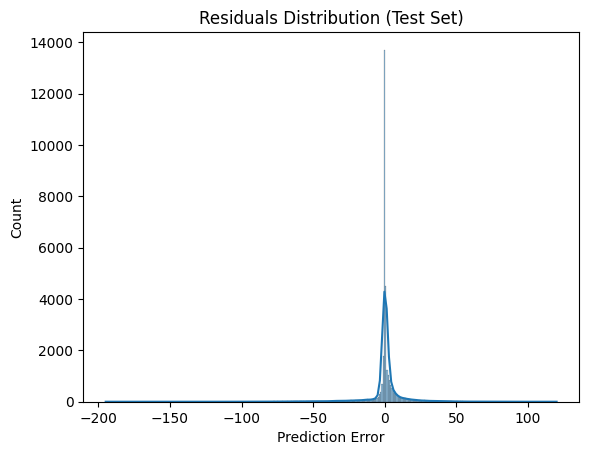

In [16]:
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Prediction Error")
plt.show()

In [17]:
df.to_csv('C:\\Users\\ommah\\OneDrive\\Desktop\\ML_Techrush\\Updateddataset.csv',index=False)

In [18]:
import joblib
joblib.dump(xgb_model, 'C:\\Users\\ommah\\OneDrive\\Desktop\\ML_Techrush\\xgb_model.pkl')
print("Model saved as xgb_model.pkl")

Model saved as xgb_model.pkl
